In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
data = pd.read_csv("sample_data/TehranhousePrice.csv")
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [25]:
data.dropna(inplace=True)

# Create Model

In [26]:
from sklearn.model_selection import train_test_split
X = data.drop(["Address","Price(USD)","Area"],axis=1)
Y = data["Price(USD)"]
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=42)

# Normalization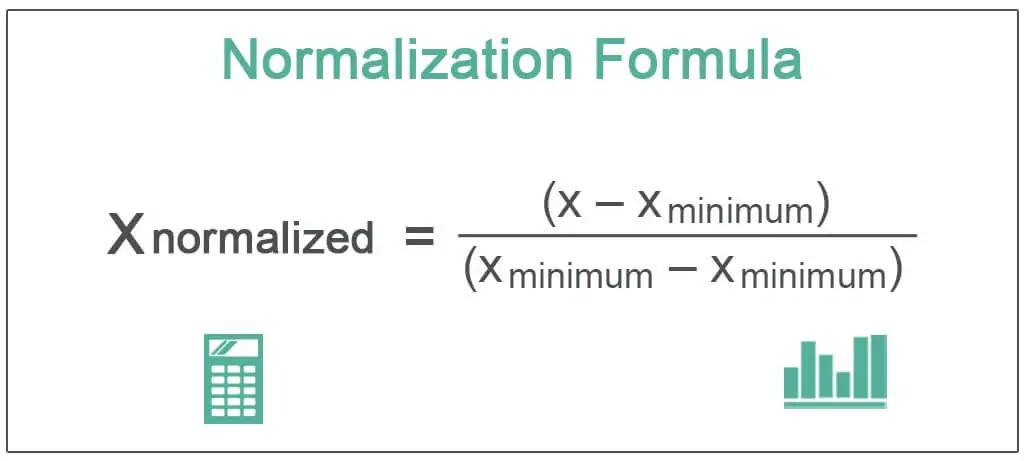


In [27]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

# Standard deviation
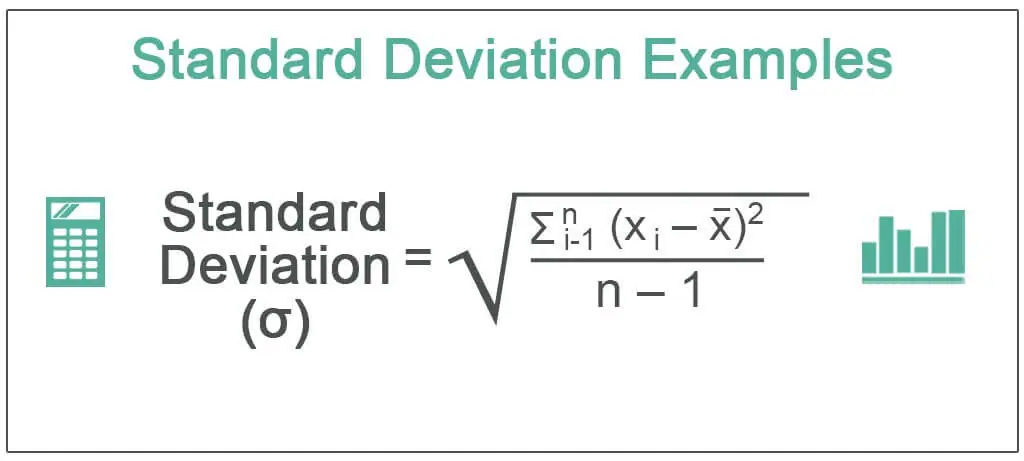

In [31]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['Room','Price']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [34]:
X_train_stand

,Room,Parking,Warehouse,Elevator,Price
1197,-0.106246,True,True,True,-0.199033
955,-0.106246,True,True,True,-0.475051
3090,-0.106246,False,False,False,-0.628677
3298,-1.436631,True,True,True,-0.575450
2451,-1.436631,False,True,True,-0.599354
...,...,...,...,...,...
1098,-0.106246,True,True,True,-0.154412
1135,-0.106246,True,True,True,-0.496087
1299,1.224139,True,True,True,-0.479003
863,1.224139,True,True,True,0.597783
